<a href="https://www.kaggle.com/code/mikhail1681/analysis-of-adult-mortality-in-the-world?scriptVersionId=168638901" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Analysis of adult mortality in the world (2019-2021)

# Анализ смертности взрослого населения в мире (2019-2021)

___

This work is based on the dataset [Adult Mortality Rate (2019-2021)](https://www.kaggle.com/datasets/mikhail1681/adult-mortality-rate-2019-2021/data). The dataset is a collection of files I took from sources from the World Health Organization (WHO) and the World Bank Group.

Эта работа сделана по мотивам датасета [Adult Mortality Rate (2019-2021)](https://www.kaggle.com/datasets/mikhail1681/adult-mortality-rate-2019-2021/data). Датасет представляет собой коллекцию файлов, взятых мной из источников Всемирной Организации Здравоохранения (ВОЗ) и Группы Всемирного Банка.

___

The purpose of the study is to analyze the factors influencing the mortality rate to determine the real relationship between people's life expectancy. To do this, we will build models for predicting the mortality rate using three different methods and select the best one based on the corresponding quality indicators of the models.

Цель исследования заключается в анализе факторов, влияющих на коэффициент смертности, для определения реальной зависимости продолжительности жизни людей. Для этого построим модели предсказания коэффициента смертности с использованием трех различных методов и выберем наилучший из них на основе соответствующих показателей качества моделей.

___

Data Description

- Countries: Country of study.

- Continent: Continent location of the country.

- Average_Pop(thousands people): Average population of the country under study for 2019-2021 in thousands.

- Average_GDP(M\$): Average GDP of the country under study for 2019-2021 in millions of dollars.

- Average_GDP_per_capita: Average GDP per capita of the country under study for 2019-2021 in dollars.

- Average_HEXP($): Health Expenditure Per Capita in the country under study in dollars.

- Development_level: Level of development of the state under study (calculated by GDP per capita of the country).

- AMR_female(per_1000_female_adults): Average mortality of adult women in the country under study (per 1000 adult women per year) for 2019-2023.

- AMR_male(per_1000_male_adults): Average mortality of adult men in the country under study (per 1000 adult men per year) for 2019-2023.

- Average_CDR: Average crude mortality rate for 2019–2021 in the country under study.

Описание данных

- Countries: Страна исследования.

- Continent: Континентальное расположение страны.

- Average_Pop(thousands people): Средняя численность населения исследуемой страны за 2019-2021 гг., тыс. человек.

- Average_GDP(M$): Средний ВВП исследуемой страны за 2019-2021 гг. в миллионах долларов.

- Average_GDP_per_capita: Средний ВВП на душу населения исследуемой страны за 2019-2021 годы в долларах.

- Average_HEXP($): Расходы на здравоохранение на душу населения в исследуемой стране в долларах.

- Development_level: Уровень развития исследуемого государства (рассчитывается по ВВП на душу населения страны).

- AMR_female(per_1000_female_adults): Средняя смертность взрослых женщин в исследуемой стране (на 1000 взрослых женщин в год) за 2019-2023 гг.

- AMR_male(per_1000_male_adults): Средняя смертность взрослых мужчин в исследуемой стране (на 1000 взрослых мужчин в год) за 2019-2023 гг.

- Average_CDR: Средний общий коэффициент смертности за 2019–2021 гг. в исследуемой стране.

___

Steps:

1. Data preparation and research.
2. Visualization.
3. Dividing data into training and test sets to train the model and evaluate its quality.
4. Training a random forest model on a training data set.
5. Model evaluation.
6. Conclusion.

Шаги:

1. Подготовка данных и исследование.
2. Визуализация.
3. Разделение данных на обучающий и тестовый наборы для обучения модели и оценки ее качества.
4. Обучение модели случайного леса на наборе обучающих данных.
5. Оценка модели.
6. Заключение.

___

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-mortality-rate-2019-2021/Adult mortality rate (2019-2021).csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ⚡1. Data preparation and research./Подготовка данных и исследование.

In [3]:
df = pd.read_csv('/kaggle/input/adult-mortality-rate-2019-2021/Adult mortality rate (2019-2021).csv')

In [4]:
df.head()

,Countries,Continent,Average_Pop(thousands people),Average_GDP(M$),Average_GDP_per_capita($),Average_HEXP($),Development_level,AMR_female(per_1000_female_adults),AMR_male(per_1000_male_adults),Average_CDR
0,Afghanistan,Asia,38947.06,17995.64,462.05,80.53,Short,204.85,322.17,7.08
1,Albania,Europe,2834.57,16263.16,5737.44,420.17,Short,53.54,103.55,10.20
2,Algeria,Africa,43445.00,160325.54,3690.31,215.53,Short,70.85,102.21,4.78
3,Angola,Africa,33428.62,72148.29,2158.28,61.29,Short,218.03,316.81,7.88
4,Antigua and Barbuda,North America,92.67,1509.63,16290.97,868.60,Average,58.76,103.77,6.06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Countries                           156 non-null    object 
 1   Continent                           156 non-null    object 
 2   Average_Pop(thousands people)       156 non-null    float64
 3   Average_GDP(M$)                     156 non-null    float64
 4   Average_GDP_per_capita($)           156 non-null    float64
 5   Average_HEXP($)                     156 non-null    float64
 6   Development_level                   156 non-null    object 
 7   AMR_female(per_1000_female_adults)  156 non-null    float64
 8   AMR_male(per_1000_male_adults)      156 non-null    float64
 9   Average_CDR                         156 non-null    float64
dtypes: float64(7), object(3)
memory usage: 12.3+ KB


In [6]:
df.isna().sum()

Countries                             0
Continent                             0
Average_Pop(thousands people)         0
Average_GDP(M$)                       0
Average_GDP_per_capita($)             0
Average_HEXP($)                       0
Development_level                     0
AMR_female(per_1000_female_adults)    0
AMR_male(per_1000_male_adults)        0
Average_CDR                           0
dtype: int64

In [7]:
df.columns

Index(['Countries', 'Continent', 'Average_Pop(thousands people)',
       'Average_GDP(M$)', 'Average_GDP_per_capita($)', 'Average_HEXP($)',
       'Development_level', 'AMR_female(per_1000_female_adults)',
       'AMR_male(per_1000_male_adults)', 'Average_CDR'],
      dtype='object')

In [8]:
indicators = ['Average_Pop(thousands people)',
       'Average_GDP(M$)', 'Average_GDP_per_capita($)', 'Average_HEXP($)', 'AMR_female(per_1000_female_adults)',
       'AMR_male(per_1000_male_adults)', 'Average_CDR']

# ⚡2. Visualization./Визуализация.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 1000x800 with 0 Axes>

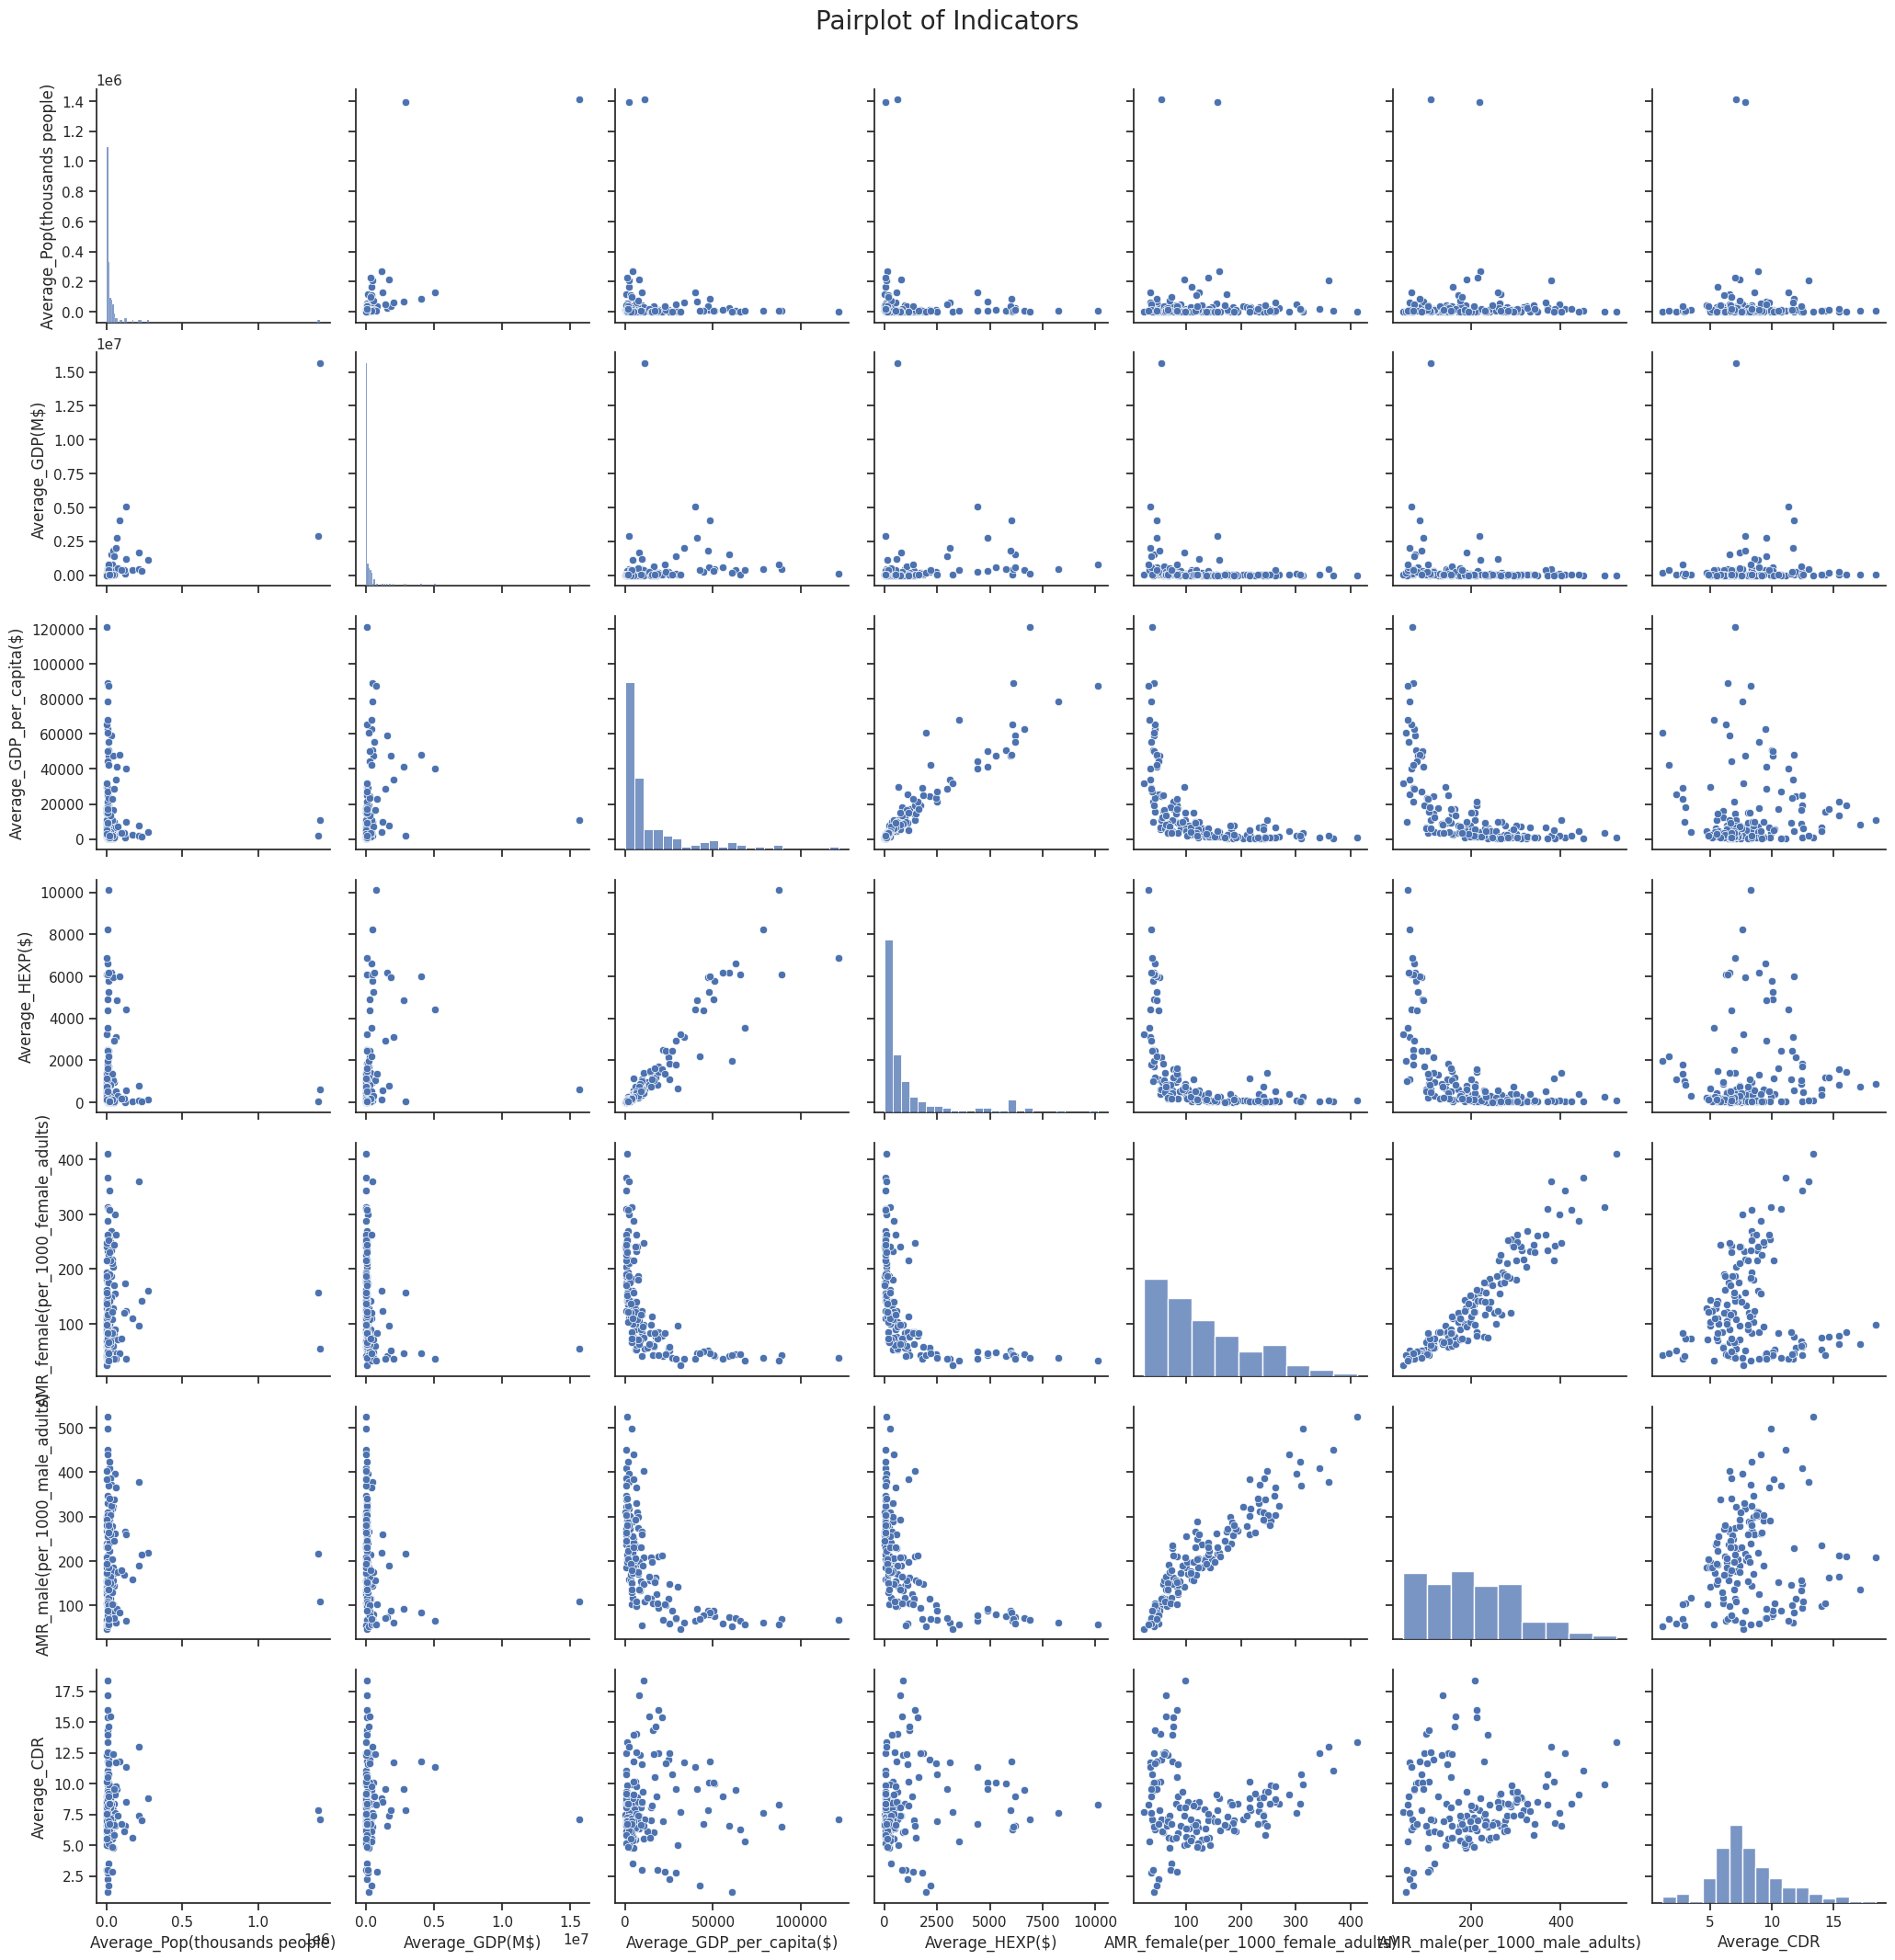

In [9]:
sns.set(style="ticks")
plt.figure(figsize=(10, 8))
sns.pairplot(df[indicators], kind='scatter', diag_kind='hist', height=3)
plt.suptitle('Pairplot of Indicators', y=1.02, fontsize=20);

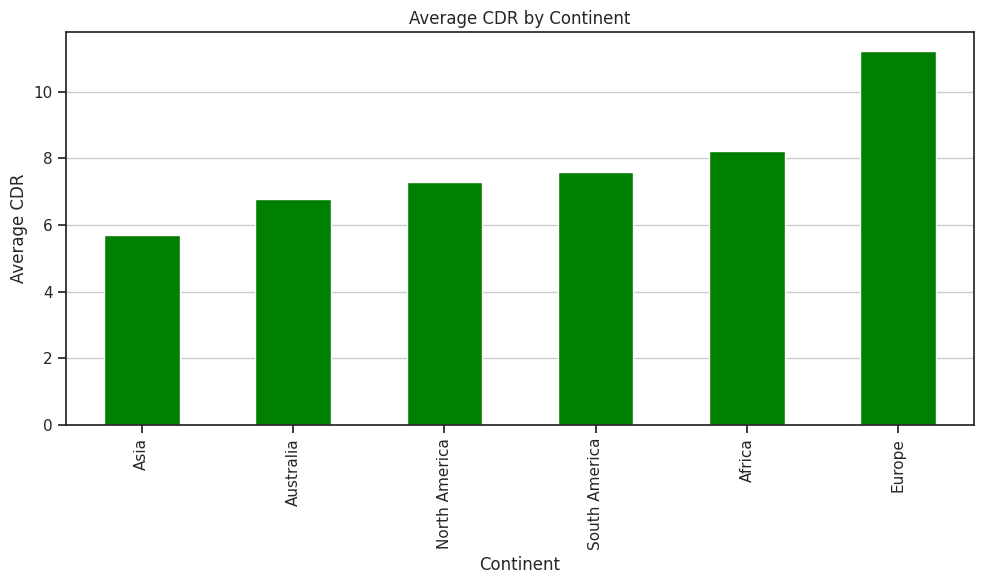

In [10]:
avg_cdr_continent = df.groupby('Continent')['Average_CDR'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_cdr_continent.plot(kind='bar', color='green')
plt.xlabel('Continent')
plt.ylabel('Average CDR')
plt.title('Average CDR by Continent')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()

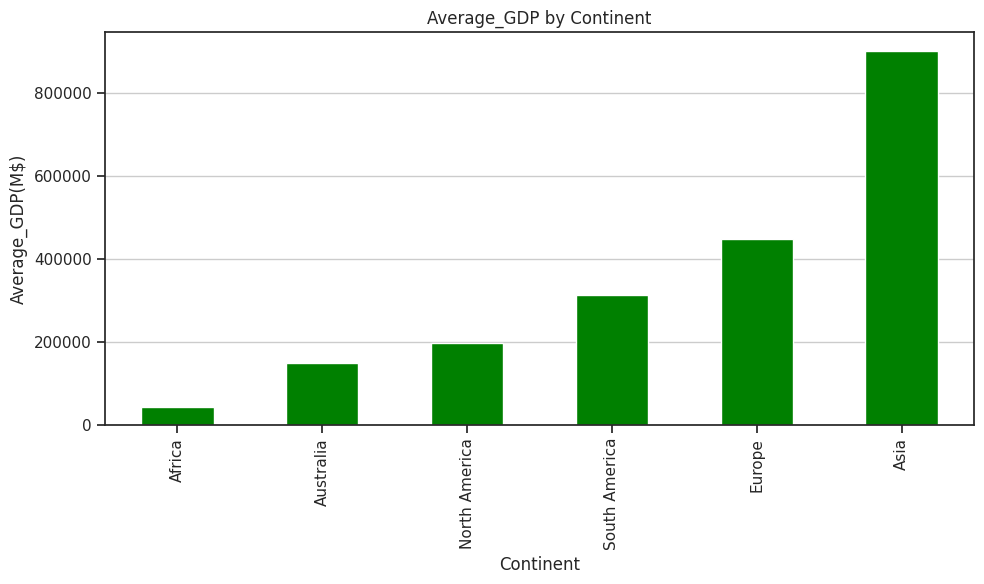

In [11]:
avg_Average_GDP_continent = df.groupby('Continent')['Average_GDP(M$)'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_Average_GDP_continent.plot(kind='bar', color='green')
plt.xlabel('Continent')
plt.ylabel('Average_GDP(M$)')
plt.title('Average_GDP by Continent')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()

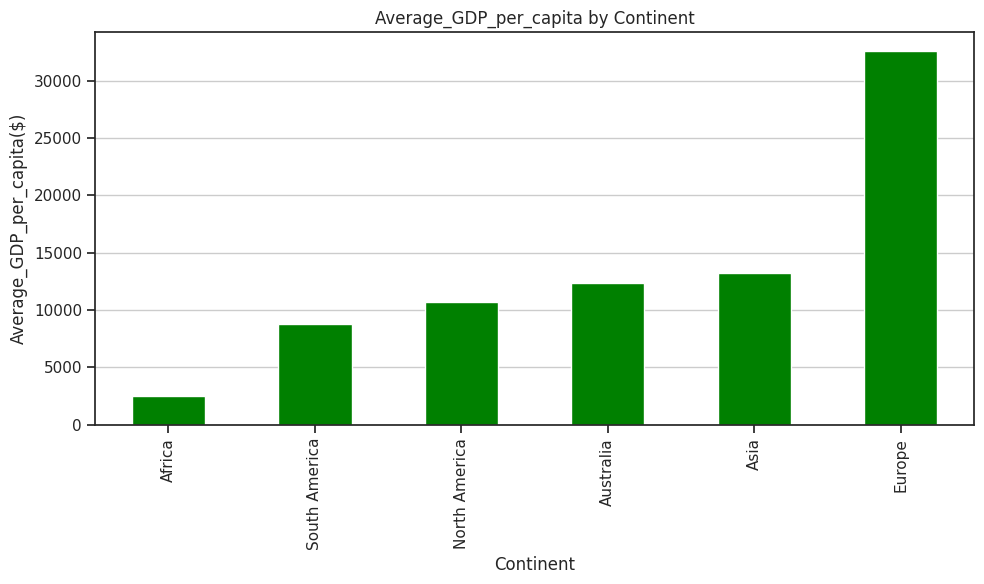

In [12]:
avg_GDP_per_continent = df.groupby('Continent')['Average_GDP_per_capita($)'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_GDP_per_continent.plot(kind='bar', color='green')
plt.xlabel('Continent')
plt.ylabel('Average_GDP_per_capita($)')
plt.title('Average_GDP_per_capita by Continent')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()

In [13]:
# We create a dictionary with the names of the continents and the corresponding data
# Создаем словарь с названиями континентов и соответствующими данными

continent_data = {
    'Asia': df[df['Continent'] == 'Asia'],
    'Europe': df[df['Continent'] == 'Europe'],
    'Africa': df[df['Continent'] == 'Africa'],
    'North America': df[df['Continent'] == 'North America'],
    'South America': df[df['Continent'] == 'South America'],
    'Australia': df[df['Continent'] == 'Australia']
}

<Figure size 1000x600 with 0 Axes>

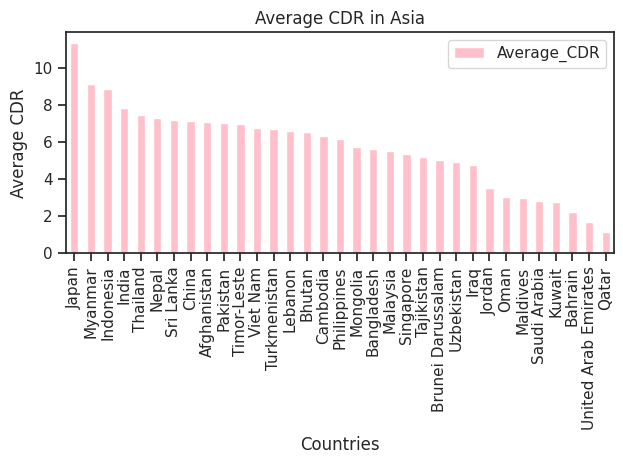

<Figure size 1000x600 with 0 Axes>

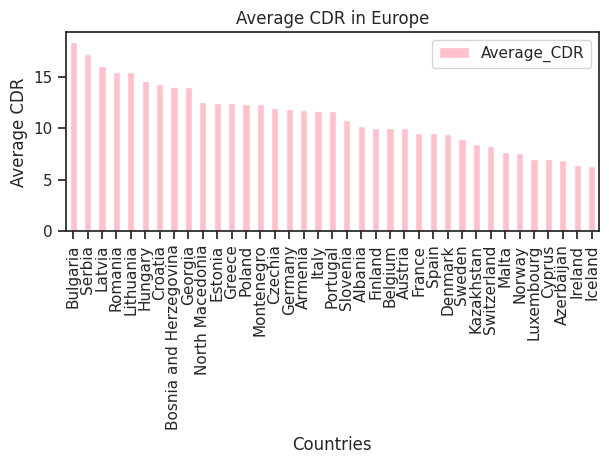

<Figure size 1000x600 with 0 Axes>

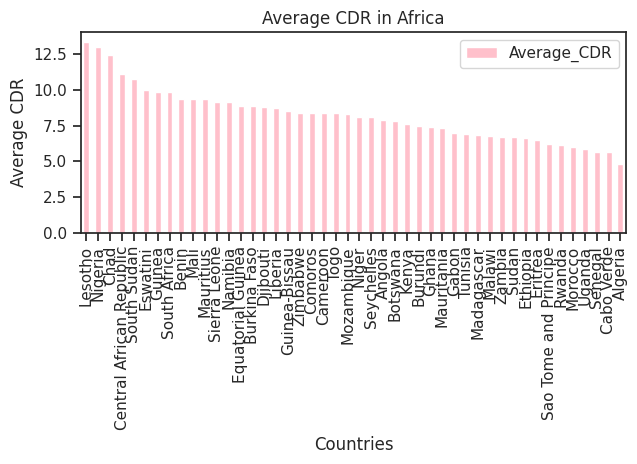

<Figure size 1000x600 with 0 Axes>

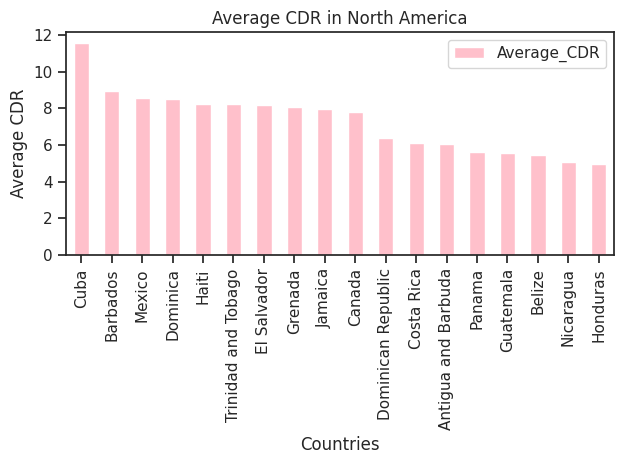

<Figure size 1000x600 with 0 Axes>

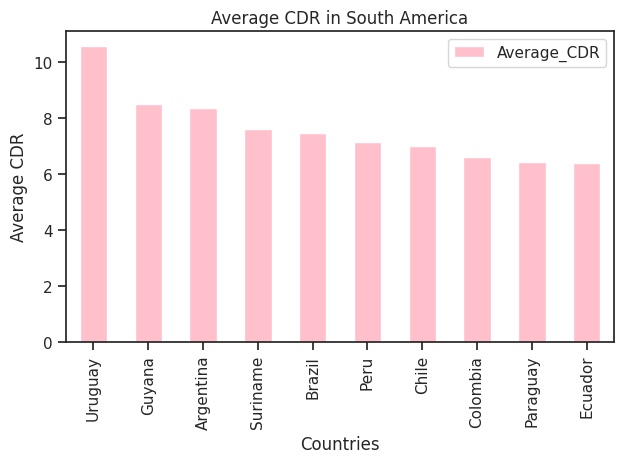

<Figure size 1000x600 with 0 Axes>

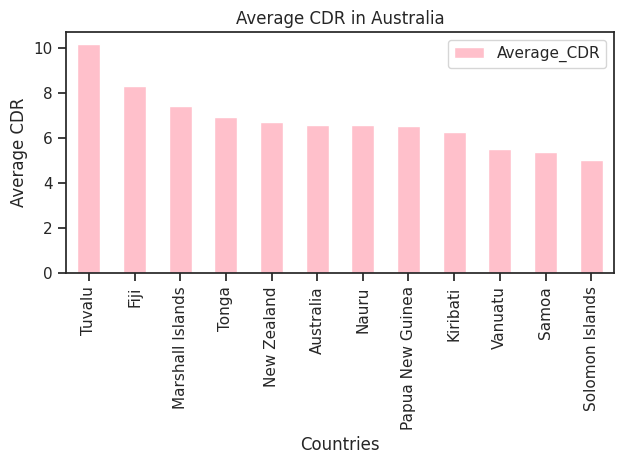

In [14]:
for continent, data in continent_data.items():
    plt.figure(figsize=(10, 6))
    data_sorted = data.sort_values(by='Average_CDR', ascending=False)
    data_sorted.plot(kind='bar', x='Countries', y='Average_CDR', color='pink')
    plt.xlabel('Countries')
    plt.ylabel('Average CDR')
    plt.title(f'Average CDR in {continent}')
    plt.xticks(rotation=90) 
    plt.tight_layout()

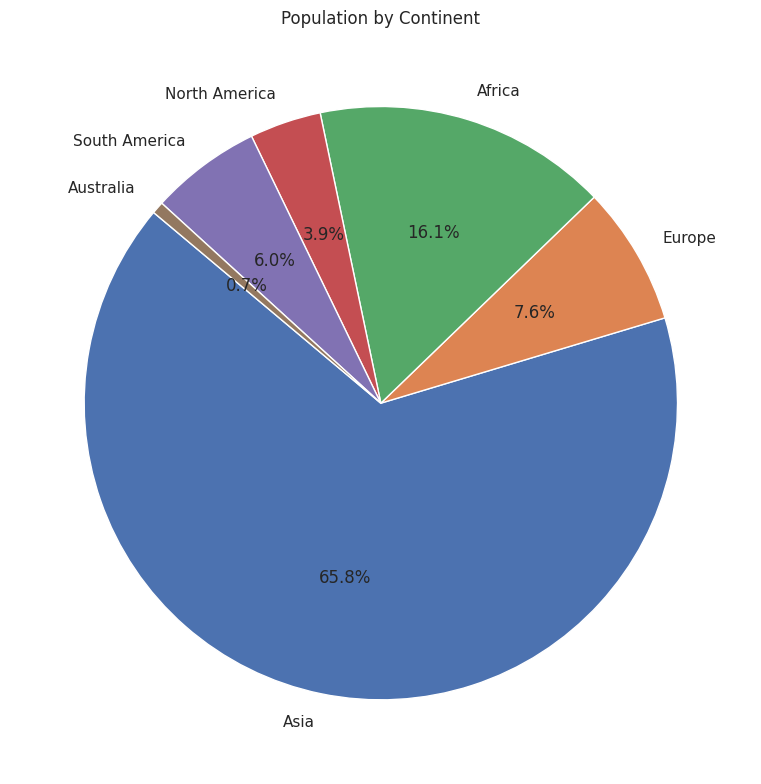

In [15]:
population_by_continent = {continent: data['Average_Pop(thousands people)'].sum() for continent, data in continent_data.items()}

# Building a Pie Chart/Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(population_by_continent.values(), labels=population_by_continent.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Population by Continent')
plt.tight_layout()

In [16]:
df[['Countries', 'Average_GDP_per_capita($)', 'Development_level', 'Average_CDR']].sort_values(by='Average_CDR', ascending=False)[:15]

,Countries,Average_GDP_per_capita($),Development_level,Average_CDR
21,Bulgaria,10738.80,Average,18.40
125,Serbia,8122.02,Short,17.17
79,Latvia,19069.45,Average,16.03
119,Romania,13637.17,Average,15.47
83,Lithuania,21212.16,Average,15.43
65,Hungary,17225.54,Average,14.63
35,Croatia,15746.29,Average,14.33
17,Bosnia and Herzegovina,6468.10,Short,14.02
54,Georgia,4658.50,Short,14.01
81,Lesotho,1052.10,Short,13.35


In [17]:
df[['Countries', 'Average_GDP_per_capita($)', 'Development_level', 'Average_CDR']].sort_values(by='Average_CDR', ascending=True)[:15]

,Countries,Average_GDP_per_capita($),Development_level,Average_CDR
118,Qatar,60618.75,High,1.17
149,United Arab Emirates,42437.57,High,1.70
10,Bahrain,25384.84,Average,2.24
78,Kuwait,29033.61,Average,2.78
123,Saudi Arabia,22652.99,Average,2.81
88,Maldives,9575.25,Short,2.96
109,Oman,18309.09,Average,3.01
74,Jordan,4116.46,Short,3.50
69,Iraq,4776.35,Short,4.76
2,Algeria,3690.31,Short,4.78


In [18]:
new_indicators = ['Average_Pop(thousands people)',
       'Average_GDP(M$)', 'Average_GDP_per_capita($)', 'Average_HEXP($)', 'AMR_female(per_1000_female_adults)',
       'AMR_male(per_1000_male_adults)']

In [19]:
# Converting categorical features into numbers/Преобразуем категориальные признаки в числовые

df = pd.get_dummies(df, columns=['Continent', 'Development_level'], drop_first=True)

# ⚡3. Dividing data into training and test sets to train the model and evaluate its quality./Разделение данных на обучающий и тестовый наборы для обучения модели и оценки ее качества.

In [20]:
# Let's divide the data into training and test sets/Разделим данные на обучающий и тестовый наборы

from sklearn.model_selection import train_test_split


X = df.drop(['Countries', 'Average_CDR'], axis=1)
y = df['Average_CDR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# ⚡4. Model training using linear regression. Model evaluation./Обучение модели методом линейной регрессии. Оценка модели.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


model_LR = LinearRegression()
model_LR.fit(X_train, y_train)


model_LR.score(X_test, y_test)

y_pred_LR = model_LR.predict(X_test)
mse_LR = mean_squared_error(y_test, y_pred_LR)
mae_LR = mean_absolute_error(y_test, y_pred_LR)
print(f'R^2: {model_LR.score(X_test, y_test)}')
print(f'mse: {mse_LR}')
print(f'mae: {mae_LR}')
print(f"AVG 'Average_CDR': {df['Average_CDR'].mean()}")


R^2: 0.07169688238840577
mse: 7.526407538080386
mae: 1.5505259291026703
AVG 'Average_CDR': 8.143653846153844


# ⚡5. Model training using random forest. Model evaluation./Обучение модели методом случайного леса. Оценка модели.

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


model_RF = RandomForestRegressor(random_state=101)
model_RF.fit(X_train, y_train)


y_pred_RF = model_RF.predict(X_test)
mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print(f'R^2: {model_RF.score(X_test, y_test)}')
print(f'mse: {mse_RF}')
print(f'mae: {mae_RF}')
print(f"AVG 'Average_CDR': {df['Average_CDR'].mean()}")


R^2: 0.7240777644952305
mse: 2.237096002187499
mae: 1.1589906249999995
AVG 'Average_CDR': 8.143653846153844


# ⚡6. Model training using gradient boosting. Model evaluation./Обучение модели методом градиентный бустинг. Оценка модели.

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


model_GB = GradientBoostingRegressor(random_state=42)
model_GB.fit(X_train, y_train)


y_pred_GB = model_GB.predict(X_test)
mse_GB = mean_squared_error(y_test, y_pred_GB)
mae_GB = mean_absolute_error(y_test, y_pred_GB)
print(f'R^2: {model_GB.score(X_test, y_test)}')
print(f'mse: {mse_GB}')
print(f'mae: {mae_GB}')
print(f"AVG 'Average_CDR': {df['Average_CDR'].mean()}")

R^2: 0.637267226199048
mse: 2.9409302104558566
mae: 1.3214304880385626
AVG 'Average_CDR': 8.143653846153844


# ⚡7. Conclusion./Заключение.

So we built three machine learning models to predict the global adult mortality rate. Obviously, the random forest method is the best fit of our models in this case. Random forest model performance: R^2: 0.72, mse: 2.24, mae: 1.16. These metrics indicate that the model performs well and demonstrates good ability to predict mortality rates based on the available data. The presence of a high value of the coefficient of determination R^2 (close to 1) indicates that the model explains well the variation in the target variable (mortality rate) using the available features. The mean square error (mse) and mean absolute error (mae) values are also low, which means that the model predictions differ little from the actual values. We also see that high GDP and high spending on health care per capita of a country do not guarantee a low mortality rate. Which gives us food for further research.

Итак, мы построили три модели машинного обучения для предсказания коэффициента смертности взрослого населения в мире. Очевидно, что метод случайного леса в данном случае подходит лучше всего из наших моделей. Показатели модели случайного леса: R^2: 0.72, mse: 2.24, mae: 1.16. Эти метрики говорят о том, что модель хорошо работает и демонстрирует хорошую способность к предсказанию коэффициента смертности на основе имеющихся данных. Наличие высокого значения коэффициента детерминации R^2 (близкого к 1) указывает на то, что модель хорошо объясняет вариацию целевой переменной (коэффициента смертности) с использованием доступных признаков. Значения среднеквадратичной ошибки (mse) и средней абсолютной ошибки (mae) также низкие, что означает маленькое отклонение предсказаний модели от фактических значений. Также мы видим, что высокий ВВП, высокие траты на здравоохранение на душу населения страны не дают гарантию низкого коэффициента смертности. Что дает нам пищу для дальнейших исследований.